In [24]:
import os
import cPickle as pkl
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Check MBS-PBS 10% data availability

In [2]:
ROOT = os.path.join('..','..','..','data')

mbs_files = filter(lambda x: x.startswith('MBS'), os.listdir(ROOT))
pbs_files = filter(lambda x: x.startswith('PBS'), os.listdir(ROOT))
sample_pin_lookout = filter(lambda x: x.startswith('SAMPLE'), os.listdir(ROOT))[0]

print('MBS files:')
for mbs in mbs_files:
    print('{}'.format(os.path.join(ROOT, mbs)))
    
print('PBS files:')
for pbs in pbs_files:
    print('{}'.format(os.path.join(ROOT, pbs)))
    
print('Sample PIN lookout: {}'.format(os.path.join(ROOT, sample_pin_lookout)))

MBS files:
../../../data/MBS_SAMPLE_10PCT_2010.csv
../../../data/MBS_SAMPLE_10PCT_2013.csv
../../../data/MBS_SAMPLE_10PCT_2008.csv
../../../data/MBS_SAMPLE_10PCT_2009.csv
../../../data/MBS_SAMPLE_10PCT_2011.csv
../../../data/MBS_SAMPLE_10PCT_2014.csv
../../../data/MBS_SAMPLE_10PCT_2012.csv
PBS files:
../../../data/PBS_SAMPLE_10PCT_2010.csv
../../../data/PBS_SAMPLE_10PCT_2011.csv
../../../data/PBS_SAMPLE_10PCT_2012.csv
../../../data/PBS_SAMPLE_10PCT_2014.csv
../../../data/PBS_SAMPLE_10PCT_2009.csv
../../../data/PBS_SAMPLE_10PCT_2013.csv
../../../data/PBS_SAMPLE_10PCT_2008.csv
Sample PIN lookout: ../../../data/SAMPLE_PIN_LOOKUP.csv


# Summary plots
## Concessional diabetic in the years

In [11]:
dd = pkl.load(open('../tmp/dump_dd_.pkl','rb')) # diabetics
cc = pkl.load(open('../tmp/dump_cc_.pkl','rb')) # continuously and consistently concessionals

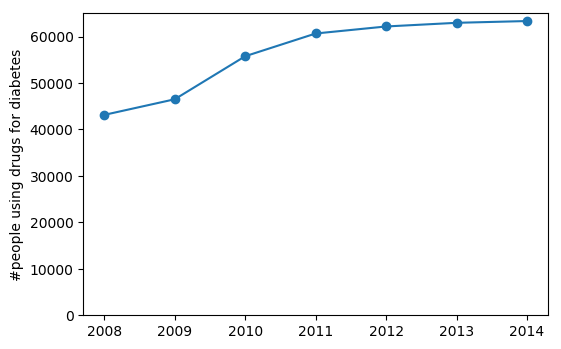

In [13]:
years = np.arange(2008, 2015)

plt.figure(dpi=100)
lengths = [len(set(dd['PBS_SAMPLE_10PCT_'+str(k)+'.csv']).intersection(cc)) for k in years]
plt.plot(years, lengths, '-o')
plt.ylabel('#people using drugs for diabetes')
plt.ylim([0, 65000])
plt.savefig('../tmp/people_using_dd.png');

## Concessional new diabetics

In [19]:
starting = []
for year in years[1:]:
    positive_subjects = pd.read_csv('../tmp/dump_{}_class_1.csv'.format(year))
    starting.append(len(positive_subjects))

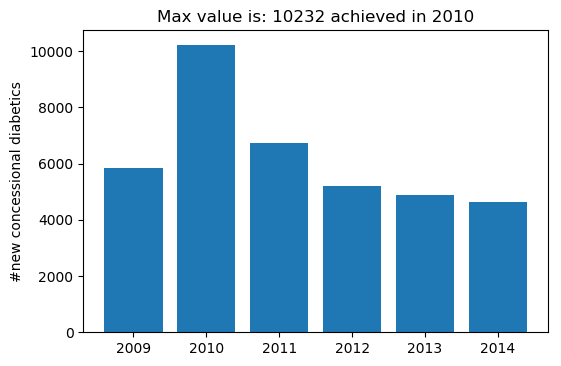

In [20]:
plt.figure(dpi=100)
plt.bar(np.arange(len(starting)), starting)
plt.xticks(np.arange(len(starting)), years[1:])
plt.ylabel('#new concessional diabetics')
plt.title('Max value is: {} achieved in {}'.format(np.max(starting),
                                             years[1:][np.argmax(starting)]))
plt.savefig('../tmp/people_started_using_dd.png');

# tmp

In [ ]:
concessionals = []
for pbs in tqdm(pbs_files):
    df = pd.read_csv(os.path.join(ROOT, pbs), header=0, index_col=0, usecols=['PTNT_ID', 'PTNT_CTGRY_DRVD_CD'])
    c0c1 = df.loc[df['PTNT_CTGRY_DRVD_CD'].isin(['C0', 'C1'])]
    _tmp = set(c0c1.index.tolist()).intersection(cc)
    concessionals.append(len(_tmp))

 86%|████████▌ | 6/7 [01:21<00:13, 13.61s/it]

In [ ]:
plt.figure(dpi=100)
plt.bar(np.arange(len(concessionals)), concessionals)
plt.xticks(np.arange(len(concessionals)), years)
plt.ylabel('#unique concessionals')
plt.title('Max value is: {} achieved in {}'.format(np.max(concessionals),
                                             years[np.argmax(concessionals)]))
plt.savefig('../tmp/concessionals.png')